In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Step 3: Load Dataset
data = pd.read_csv(r"C:\Users\AKHIL\Downloads\archive (9)\heart_cleveland_upload.csv")  # change path if needed

# Display first few rows
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
print("Rows and Columns:", data.shape)

Rows and Columns: (297, 14)


In [9]:
print("\nColumns in dataset:\n", data.columns)



Columns in dataset:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [11]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


In [13]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [15]:
# Check unique values in each column
for col in data.columns:
    print(f"{col}: {data[col].unique()}")


age: [69 66 65 64 63 61 60 59 58 56 52 51 45 42 40 38 34 74 71 70 62 57 55 54
 50 49 48 46 44 41 35 29 76 68 67 53 47 43 39 37 77]
sex: [1 0]
cp: [0 1 2 3]
trestbps: [160 140 150 138 110 170 145 134 178 120 118 152 125 148 156 128 136 130
 124 154 135 132 108 192 101 105 112 126 122 180 115 146 155 102 172 100
  94 129 142 144 106 117 158 174 164 114 165 200 123 104]
chol: [234 239 226 282 211 227 233 240 270 288 273 204 283 193 186 298 213 264
 244 199 231 182 269 302 245 246 195 281 208 221 284 319 236 261 232 294
 250 262 342 309 325 201 205 271 266 229 197 160 308 263 219 220 295 203
 198 235 306 157 192 210 265 254 274 277 564 212 278 417 360 335 313 252
 243 185 318 178 218 230 224 340 168 126 256 258 214 304 267 196 222 175
 188 149 275 255 257 253 177 141 242 315 209 180 268 321 215 174 322 286
 299 237 223 228 225 248 303 407 330 187 164 394 260 307 166 207 206 293
 305 326 249 176 216 259 300 276 289 241 131 354 184 409 217 353 327 200
 311 169 290 341 247 172 167 183]
fbs: [

In [17]:
# Basic statistical summary
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [23]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [34]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

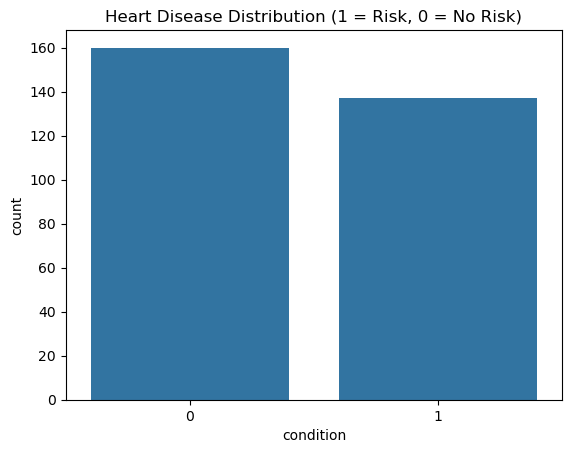

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='condition', data=data)
plt.title('Heart Disease Distribution (1 = Risk, 0 = No Risk)')
plt.show()


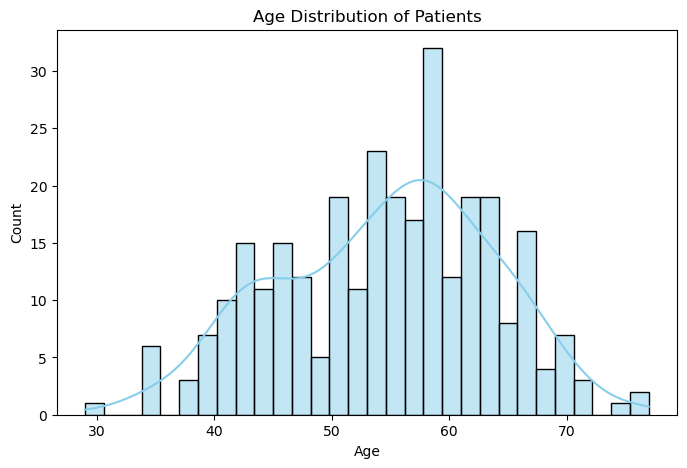

In [38]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


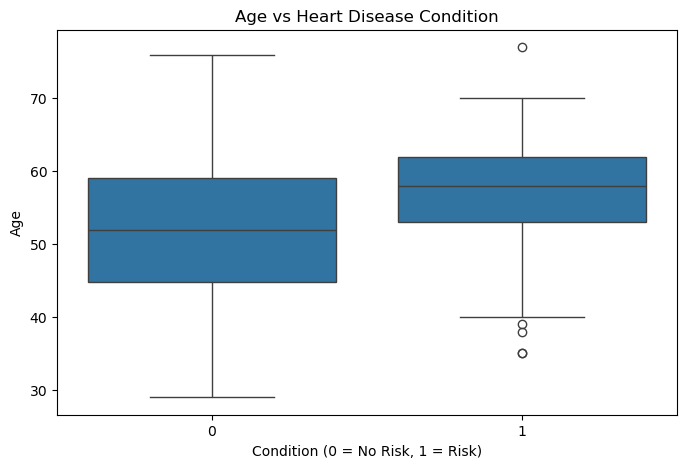

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='condition', y='age', data=data)
plt.title('Age vs Heart Disease Condition')
plt.xlabel('Condition (0 = No Risk, 1 = Risk)')
plt.ylabel('Age')
plt.show()


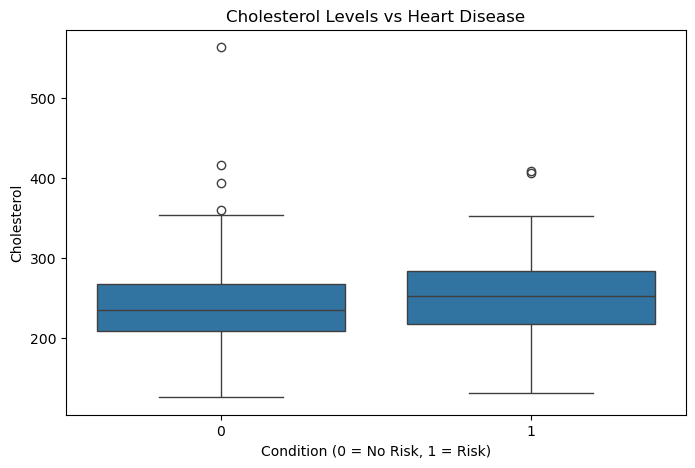

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x='condition', y='chol', data=data)
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Condition (0 = No Risk, 1 = Risk)')
plt.ylabel('Cholesterol')
plt.show()


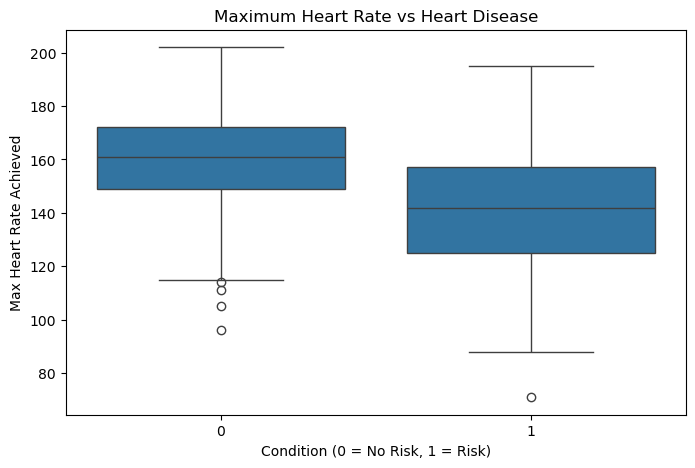

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='condition', y='thalach', data=data)
plt.title('Maximum Heart Rate vs Heart Disease')
plt.xlabel('Condition (0 = No Risk, 1 = Risk)')
plt.ylabel('Max Heart Rate Achieved')
plt.show()


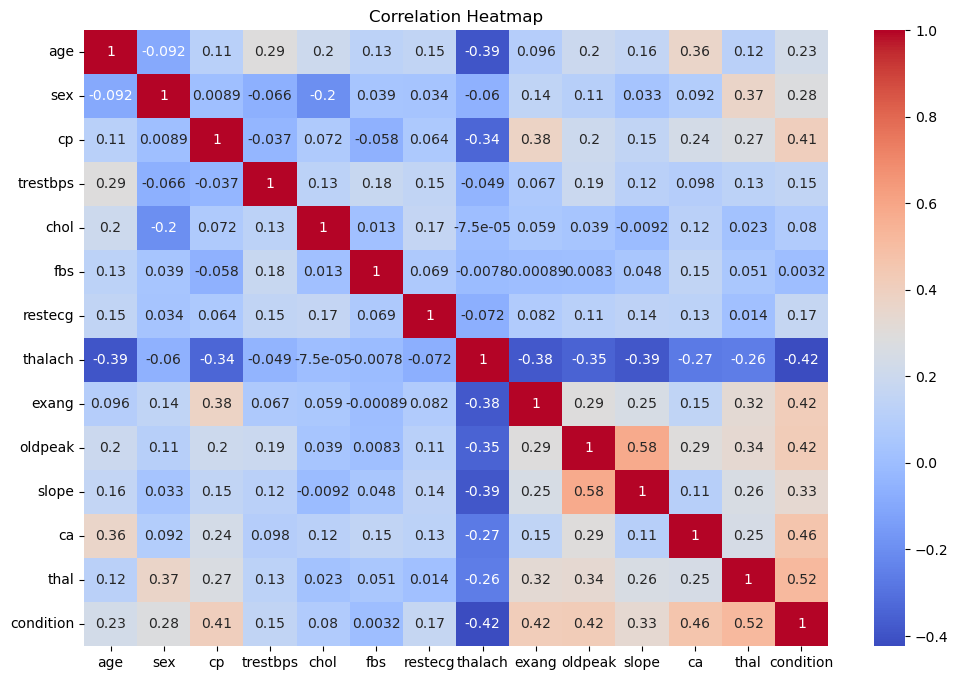

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [48]:
# Check for missing values
data.isnull().sum()



age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Loop through columns and encode if data type is object (categorical)
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])


In [56]:
data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [58]:
from sklearn.model_selection import train_test_split

# Separate input (X) and output (y)
X = data.drop('condition', axis=1)   # All columns except target
y = data['condition']                # Target column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (237, 13)
Testing data shape: (60, 13)


In [62]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

In [66]:
y_pred = model.predict(X_test)


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Detailed Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7333333333333333
Confusion Matrix:
 [[23  9]
 [ 7 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7333333333333333

Confusion Matrix:
 [[23  9]
 [ 7 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



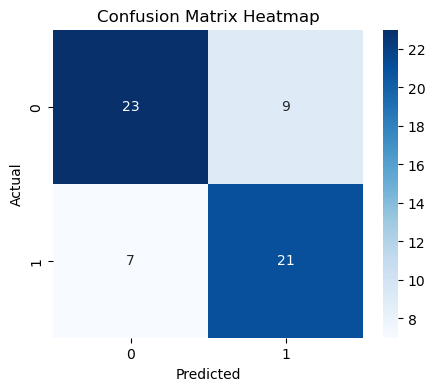

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


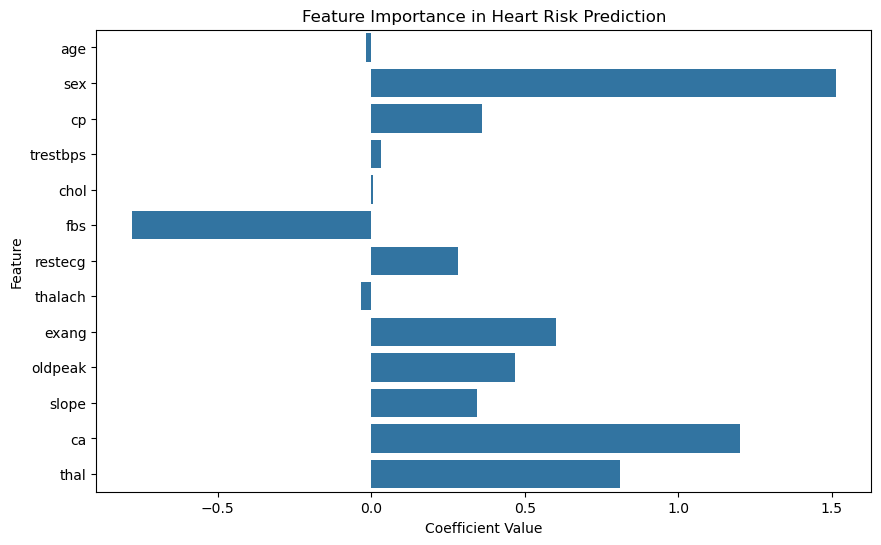

In [75]:
# 2️⃣ Feature Importance (which columns are more influential)
import numpy as np

importance = model.coef_[0]
features = X.columns

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance in Heart Risk Prediction")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [79]:
# Example patient data
# age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
new_patient = [[55, 1, 2, 140, 220, 0, 1, 150, 0, 2.3, 2, 0, 2]]

# Predict directly (no scaling)
prediction = model.predict(new_patient)

# Interpret the result
if prediction[0] == 1:
    print("⚠️ This patient is at risk of heart disease.")
else:
    print("✅ This patient is not at risk of heart disease.")

# Optional: Show probability
prob = model.predict_proba(new_patient)
print(f"Probability of No Risk: {prob[0][0]*100:.2f}%")
print(f"Probability of Risk: {prob[0][1]*100:.2f}%")


⚠️ This patient is at risk of heart disease.
Probability of No Risk: 16.01%
Probability of Risk: 83.99%


C:\Users\AKHIL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\AKHIL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [81]:
import joblib


In [83]:
# Save the trained model
joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']

In [87]:
import joblib
import pandas as pd


In [89]:
# Load the previously saved model
loaded_model = joblib.load('heart_disease_model.pkl')
